# Carregando bibliotecas

In [ ]:
!pip install category_encoders

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
titanic = pd.read_csv('/content/drive/MyDrive/Universidade de dados/Semana 7/Titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

In [7]:
titanic = titanic.drop(
    columns=[
    'Ticket', 'PassengerId', 'Name'
])
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [8]:
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
titanic.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

# Modelo de machine learning

In [10]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [11]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked', 'Cabin']
target = 'Survived'

In [12]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [13]:
X = titanic[features]
y = titanic[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
colunas_numericas = ['Age', 'SibSp','Parch', 'Fare'] # Testar Pclass como numerica(talvez tenha uma ordenação)
colunas_categoricas_ordinal = ['Pclass', 'Sex'] # Vão ser as colunas que possuem uma ordenação ou que são dummiers(0 ou 1)
colunas_categoricas_nominal = ['Cabin', 'Embarked'] # São aquelas que não possuem uma ordenação nas classes, não podemos usar ordinal encoder

# Vamos criar o pipeline de cada encoding para cada lista de colunas
ordinal_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # substituindo valores nulos pela moda
    ('encoder', ce.OrdinalEncoder())
])

nominal_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # substituindo valores nulos pela moda
    ('encoder', ce.OneHotEncoder())
])

numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    # Poderia tentar transformação polinomial
])

# Transformando as colunas através do pipeline feito acima
transformer = ColumnTransformer([
    ('ordinal_transformer', ordinal_pipe, colunas_categoricas_ordinal),
    ('nominal_transformer', nominal_pipe, colunas_categoricas_nominal),
    ('numerical_trasformer', numerical_pipe, colunas_numericas)
])

# Aplicando os encoder na base de dados de treino e apos nas de teste
X_train_transformed = transformer.fit_transform(X_train, y_train)
X_test_transformed = transformer.transform(X_test)

In [15]:
logit = LogisticRegression()

In [16]:
logit.fit(X_train_transformed, y_train)

LogisticRegression()

In [27]:
y_pred = logit.predict(X_test_transformed)

In [37]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

print(f'acuracia: {accuracy_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'Precision: {precision_score(y_test, y_pred):.2f}')
print(f'F1: {f1_score(y_test, y_pred):.2f}')
print(f'ROC/AUC: {roc_auc_score(y_test, y_pred):.2f}')

acuracia: 0.82
Recall: 0.76
Precision: 0.80
F1: 0.78
ROC/AUC: 0.81


- Precision = TP / (TP / FP): De todos que o algoritmo preveu que vai morrer, quantos realmente vão?
- Recall = TP / (TP / FN): De todos que realmente irão morrer, quais o algoritmo preveu que vão morrer?

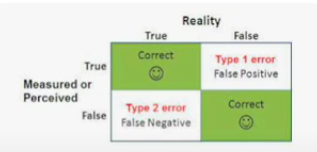

Nesse caso, como queremos poucos Falso negativo(tipo 2), ou seja, se uma pessoa tiver um pouco de chance de morrer, ja ser informada sobre, talvez seja bom mudar a confiança para "morrer", fazendo com que mesmo com menos confiança, se tiver uma certra probabilidade de morrer, realmente preveja isso


Para isso, muitas vezes vamos ter que fazer uma troca de desempenho, melhorando uma metrica(a ideal para o caso) e piorando alguma ouutra, precisa-se analisar para entender se vale a pena fazer essa troca

In [38]:
# Mudando o threshold(certeza)
# pegamos apensas a probabilidade de ser 1(segundo elemento do array) e ver se ele é maior ou igual a 0.3, ou seja, sempre que tivermos uma probabilidade de morte maior que 0.3, sera considerado como morte
y_pred_tsh = (logit.predict_proba(X_test_transformed)[:, 1] >= 0.3).astype('bool')

print(f'acuracia: {accuracy_score(y_test, y_pred_tsh):.2f}')
print(f'Recall: {recall_score(y_test, y_pred_tsh):.2f}')
print(f'Precision: {precision_score(y_test, y_pred_tsh):.2f}')
print(f'F1: {f1_score(y_test, y_pred_tsh):.2f}')
print(f'ROC/AUC: {roc_auc_score(y_test, y_pred_tsh):.2f}')

acuracia: 0.79
Recall: 0.89
Precision: 0.69
F1: 0.78
ROC/AUC: 0.81


no caso anterior, focamos no recall ,uma vez que é mais importante estar certo quando o cliente realmente for morrer, ou seja, o pior caso seria falar que o cliente NÃO  vai morrer e ele morrer

Mas se caso queiramos um modelo que foque no acerto quanto o modelo falar que ele vai morrer, ou seja, que o modelo seja bastante preciso na hora de declarar uma morte, que sejam poucos os casos que o modelo previu que ele iria morrer mas na verdade ele sobreviveu

In [40]:
# Para efetuar esse caso, temos que aumentar a precisão
# Para isso, vamos fazer com que o algoritmo precise ter mais confiança em declarar a morte como 1
# Com isso, ele vai ter uma maior certeza quando a resposta for 1, e por consequencia, vai errar menos quando declarar 1, ou seja, poucos seram os casos que o modelo declarou como 1 mas na verdade o passageiro viveu, que é o objetivo aqui

# basta aumentar o treshold
y_pred_tsh = (logit.predict_proba(X_test_transformed)[:, 1] >= 0.7).astype('bool')

print(f'acuracia: {accuracy_score(y_test, y_pred_tsh):.2f}')
print(f'Recall: {recall_score(y_test, y_pred_tsh):.2f}')
print(f'Precision: {precision_score(y_test, y_pred_tsh):.2f}')
print(f'F1: {f1_score(y_test, y_pred_tsh):.2f}')
print(f'ROC/AUC: {roc_auc_score(y_test, y_pred_tsh):.2f}')

acuracia: 0.79
Recall: 0.54
Precision: 0.91
F1: 0.68
ROC/AUC: 0.75
